In [2]:
import pandas as pd
from sklearn.metrics.cluster import adjusted_mutual_info_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
from lifelines import CoxPHFitter

In [4]:
file_path = "/home/owkin/project/cytocommunity_results/fractions/raw/ImageNameList.txt"
# Open and read the file into a list
with open(file_path, "r") as file:
    ImageNameAll = [line.strip() for line in file]  # Remove trailing newlines/whitespaces

In [22]:
ami_all = np.zeros((74,14))

for im_ind, image_name in enumerate(ImageNameAll):
    for i in range(14):
        labels_1 = pd.read_csv(f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/2024-11-19_10-41-40/ensemble/ImageCollection/{image_name}/TCNLabel_MajorityVoting_{i+1}.csv")
        labels_2 = pd.read_csv(f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/2024-11-19_10-41-40/ensemble/ImageCollection/{image_name}/TCNLabel_MajorityVoting_{i+2}.csv")
    
        labels_1 = labels_1.values.squeeze()
        labels_2 = labels_2.values.squeeze()
    
        ami_all[im_ind, i] = adjusted_mutual_info_score(labels_1, labels_2)


KeyboardInterrupt: 

(0.0, 1.0)

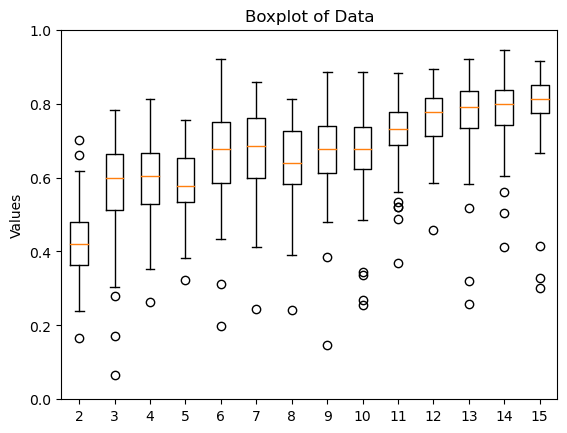

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Example array (replace with your own data)
data = np.random.randn(100)  # 100 random values from a normal distribution

# Create the boxplot
plt.boxplot(ami_all, labels=[str(i+2) for i in range(14)])

# Add labels and title
plt.title("Boxplot of Data")
plt.ylabel("Values")

# Show the plot
plt.ylim([0,1])


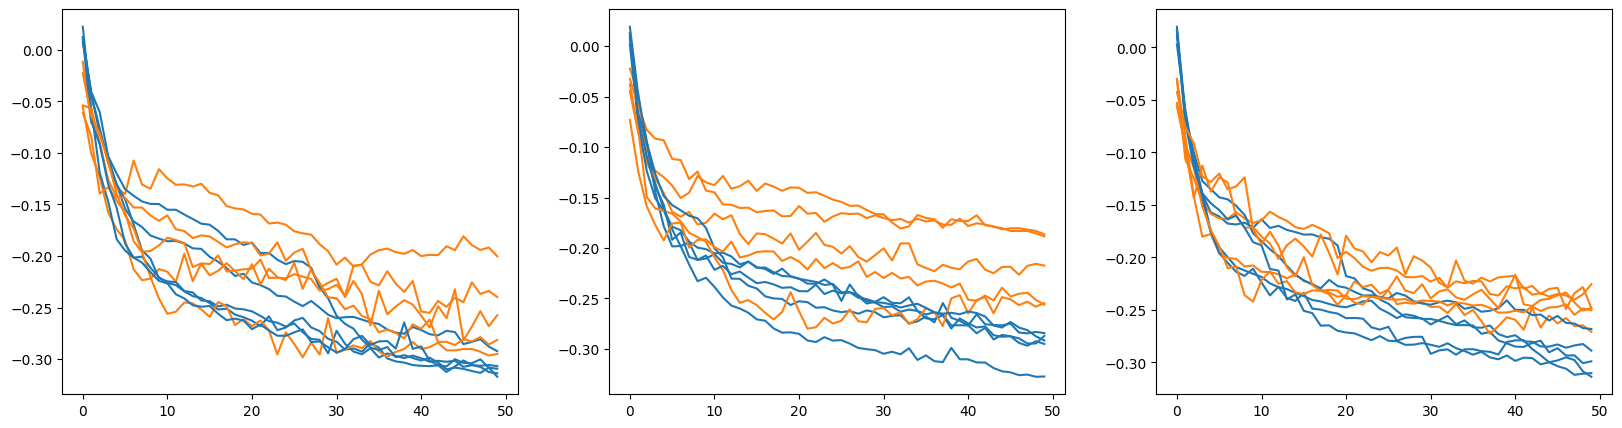

In [3]:
timestamp = "2024-11-25_15-35-12"

plt.figure(figsize=(20,5))
for time in range(3):
    plt.subplot(1,3,time+1)
    for fold in range(5):
        fpath = f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{timestamp}/crossval/Time{time+1}/Fold{fold+1}/Epoch_TrainLoss.csv"
        df = pd.read_csv(fpath)
        TrainLoss_MinCut = df["TrainLoss_MinCut"]
        TestLoss_MinCut = df["TestLoss_MinCut"]
        plt.plot(TrainLoss_MinCut, color="tab:blue")
        plt.plot(TestLoss_MinCut, color="tab:orange")

# Subgroups

In [5]:
freq_all = np.zeros((74,5))

timestamp = "2024-11-21_13-01-11"
for im_ind, ImageName in enumerate(ImageNameAll):
    tcn = pd.read_csv(
        f"/home/owkin/project/cytocommunity_results/fractions/supervised/experiments/{timestamp}/ensemble/ImageCollection/{ImageName}/TCNLabel_MajorityVoting.csv",
        header = None
    )
    tcn = tcn[0].tolist()

    for tcn_num in range(5):
        indices = [index for index, value in enumerate(tcn) if value == (tcn_num+1)]
        freq_all[im_ind,tcn_num] = len(indices)/len(tcn)
        

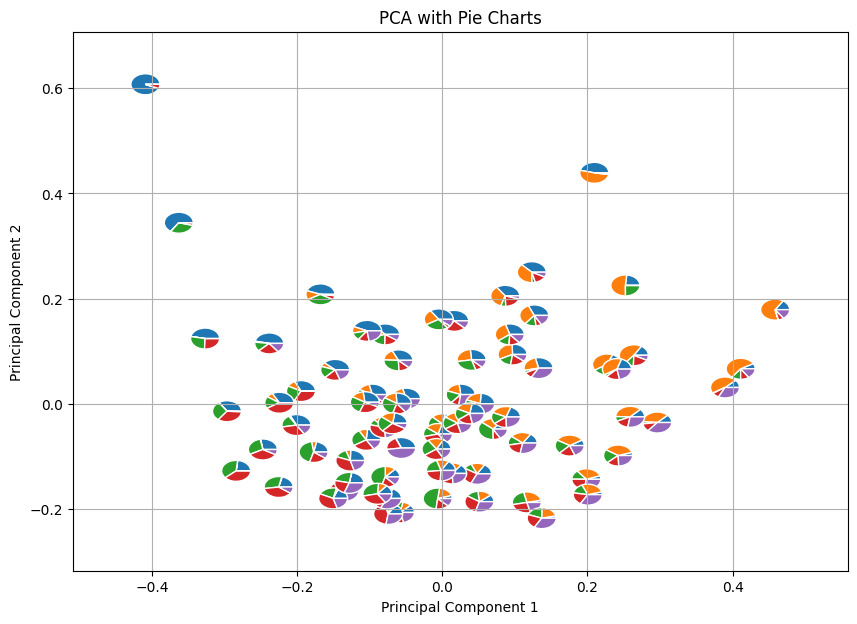

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example data (freq_all)
np.random.seed(42)

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
principal_components = pca.fit_transform(freq_all)

# Function to draw pie charts on a scatter plot
def draw_pie(ax, center, sizes, radius=0.05, colors=None):
    """
    Draws a pie chart on the given axes at a specific center.
    :param ax: Matplotlib Axes object.
    :param center: (x, y) coordinates for the pie center.
    :param sizes: List of proportions (must sum to 1).
    :param radius: Radius of the pie chart.
    :param colors: Colors for the pie slices.
    """
    from matplotlib.patches import Wedge

    # Default colors if not provided
    if colors is None:
        colors = plt.cm.tab10(np.arange(len(sizes)))

    start_angle = 0
    for size, color in zip(sizes, colors):
        end_angle = start_angle + size * 360
        wedge = Wedge(center, radius, start_angle, end_angle, facecolor=color, edgecolor='white')
        ax.add_artist(wedge)
        start_angle = end_angle

# Scatter plot with pie charts
fig, ax = plt.subplots(figsize=(10, 7))

# Plot pie charts for each data point
for i, (x, y) in enumerate(principal_components):
    draw_pie(ax, (x, y), freq_all[i], radius=0.02)

# Dynamically adjust axis limits based on the PCA data
x_min, x_max = principal_components[:, 0].min(), principal_components[:, 0].max()
y_min, y_max = principal_components[:, 1].min(), principal_components[:, 1].max()

# Set limits with a small margin
margin = 0.1  # Margin to ensure pie charts are fully visible
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)

# Add plot details
ax.set_title("PCA with Pie Charts")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.grid(True)

plt.show()

/home/owkin/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


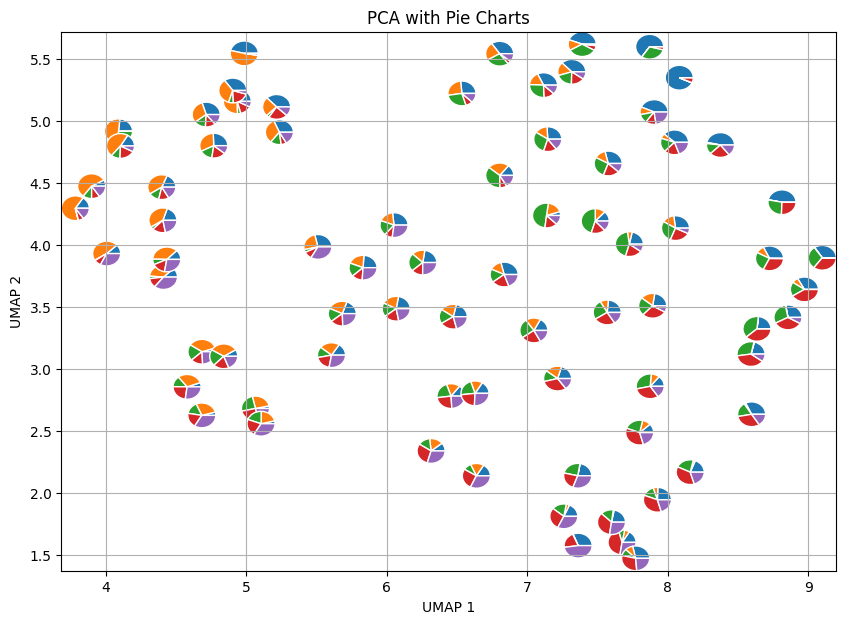

In [60]:
np.random.seed(42)

# Initialize UMAP with 2 components (2D space)
umap_model = umap.UMAP(n_components=2, random_state=0)

# Fit and transform the data
principal_components = umap_model.fit_transform(freq_all)

# Scatter plot with pie charts
fig, ax = plt.subplots(figsize=(10, 7))

# Plot pie charts for each data point
for i, (x, y) in enumerate(principal_components):
    draw_pie(ax, (x, y), freq_all[i], radius=0.1)

# Dynamically adjust axis limits based on the PCA data
x_min, x_max = principal_components[:, 0].min(), principal_components[:, 0].max()
y_min, y_max = principal_components[:, 1].min(), principal_components[:, 1].max()

# Set limits with a small margin
margin = 0.1  # Margin to ensure pie charts are fully visible
ax.set_xlim(x_min - margin, x_max + margin)
ax.set_ylim(y_min - margin, y_max + margin)

# Add plot details
ax.set_title("PCA with Pie Charts")
ax.set_xlabel("UMAP 1")
ax.set_ylabel("UMAP 2")
ax.grid(True)

plt.show()

# Clinical association

In [62]:
freq_all.shape

(74, 5)

In [52]:
fpath = "/home/owkin/project/USR_DATA/DATA_YBARECHE/RNAXplorer_analysis/RNAXplorer_CHUV_Bladder_Baseline-patids.csv"
df_baseline = pd.read_csv(fpath)

discovery_clinical = pd.read_csv("/home/owkin/project/mosaic_data/20240724/mosaic-chuv.uker-mibc-1.3_postruv_clinical_data.csv")
#discovery_clinical = discovery_clinical[discovery_clinical['os_censor'] == 0]
merged_df = pd.merge(df_baseline, discovery_clinical, left_on="Tumour block ID for MOSAIC", right_on="patient_id")

file_path = "/home/owkin/project/cytocommunity_results/fractions/raw/ImageNameList.txt"
# Open and read the file into a list
with open(file_path, "r") as file:
    ImageNameAll = [line.strip() for line in file]  # Remove trailing newlines/whitespaces

samples_w_image = [elem[:-4] for elem in ImageNameAll]
merged_df = merged_df[merged_df["Tumour block ID for MOSAIC"].isin(samples_w_image)]

In [79]:
data = merged_df[['Tumour block ID for MOSAIC', "os_years", "os_censor", "pfs_years", "pfs_censor"]]

In [86]:
feature_names = [f"TCN{i+1}" for i in range(5)]
data = pd.DataFrame(freq_all, columns=feature_names)
for var in ["os_years", "os_censor", "pfs_years", "pfs_censor"]:
    data[var] = merged_df[var]
data_clean = data.dropna()

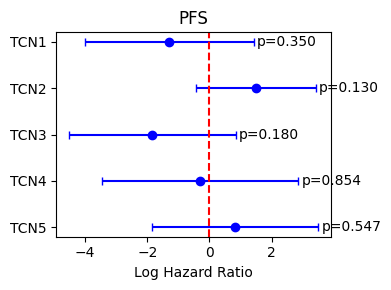

In [81]:
outcome = "pfs"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

# Simulated example data
np.random.seed(42)
n_samples = 100
n_features = 5

# Convert to DataFrame
feature_names = [f"TCN{i+1}" for i in range(n_features)]

# Compute univariate logHR, confidence intervals, and p-values
results = []
for feature in feature_names:
    cph = CoxPHFitter()
    subset = data_clean[[feature, outcome+'_years', outcome+'_censor']]
    cph.fit(subset, duration_col=outcome+'_years', event_col=outcome+'_censor')
    
    summary = cph.summary.loc[feature]
    results.append({
        'Feature': feature,
        'LogHR': summary['coef'],
        'Lower CI': summary['coef lower 95%'],
        'Upper CI': summary['coef upper 95%'],
        'p-value': summary['p']
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Plot forest plot
fig, ax = plt.subplots(figsize=(4, 3))
y_positions = np.arange(len(results_df))

# Hazard Ratios as points with confidence intervals
ax.errorbar(
    results_df['LogHR'], y_positions,
    xerr=[
        results_df['LogHR'] - results_df['Lower CI'],
        results_df['Upper CI'] - results_df['LogHR']
    ],
    fmt='o', color='blue', label='Log Hazard Ratio', capsize=3
)

# Add vertical line for null effect (LogHR=0)
ax.axvline(x=0, color='red', linestyle='--', label='Null effect (LogHR=0)')

# Add feature names and p-values as text
for i, (feature, pval) in enumerate(zip(results_df['Feature'], results_df['p-value'])):
    ax.text(
        x=results_df['Upper CI'][i] + 0.1, 
        y=i, 
        s=f"p={pval:.3f}", 
        va='center', fontsize=10
    )

# Formatting
ax.set_yticks(y_positions)
ax.set_yticklabels(results_df['Feature'])
ax.set_xlabel("Log Hazard Ratio")
ax.set_title("PFS")
ax.invert_yaxis()  # Put the first feature on top

plt.tight_layout()
plt.show()


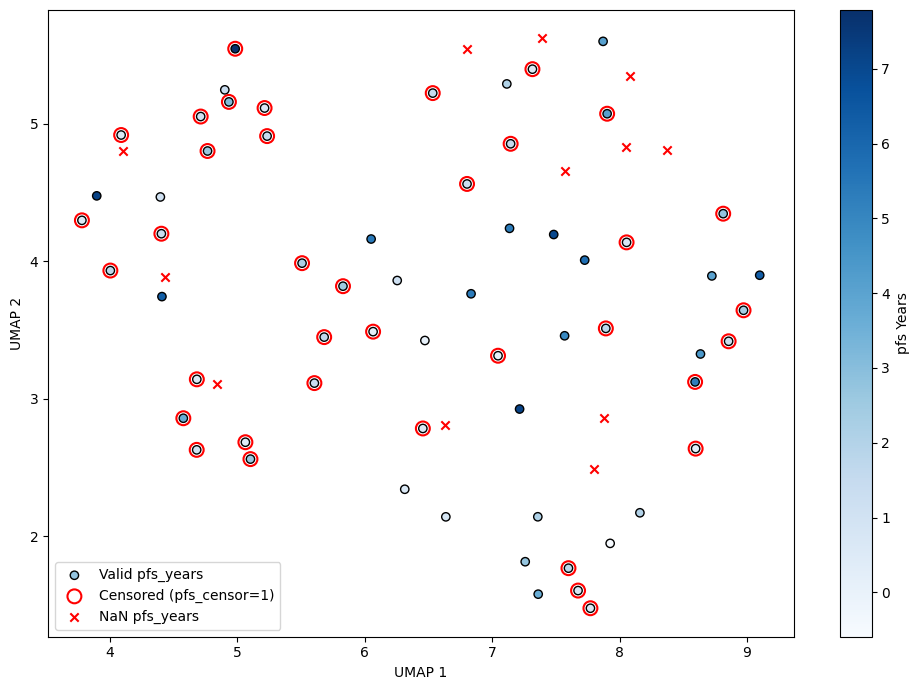

In [92]:
outcome = "pfs"

# Example data
np.random.seed(42)

# Split data
valid_data = ~data[outcome+"_years"].isna()  # Boolean mask for valid os_years
censored_data = data[outcome+"_censor"] == 1  # Boolean mask for censored data

# Create scatter plot
plt.figure(figsize=(10, 7))

# Plot valid os_years with a distinguishable color map
scatter = plt.scatter(
    principal_components[valid_data, 0],
    principal_components[valid_data, 1],
    c=data.loc[valid_data, outcome+"_years"],
    cmap="Blues",  # Better distinguishing colormap
    edgecolor="k",
    label=f"Valid {outcome}_years",
)

# Overlay red circles for censored data
plt.scatter(
    principal_components[censored_data & valid_data, 0],
    principal_components[censored_data & valid_data, 1],
    facecolors="none",  # Transparent fill
    edgecolors="red",   # Red border
    linewidths=1.5,     # Thickness of the circle
    s=100,              # Circle size
    label=f"Censored ({outcome}_censor=1)",
)

# Plot crosses for NaN os_years
plt.scatter(
    principal_components[~valid_data, 0],
    principal_components[~valid_data, 1],
    color="red",
    marker="x",
    label=f"NaN {outcome}_years",
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label(outcome+" Years")

# Add labels, legend, and title
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend()

plt.tight_layout()
plt.show()


# Sample-level

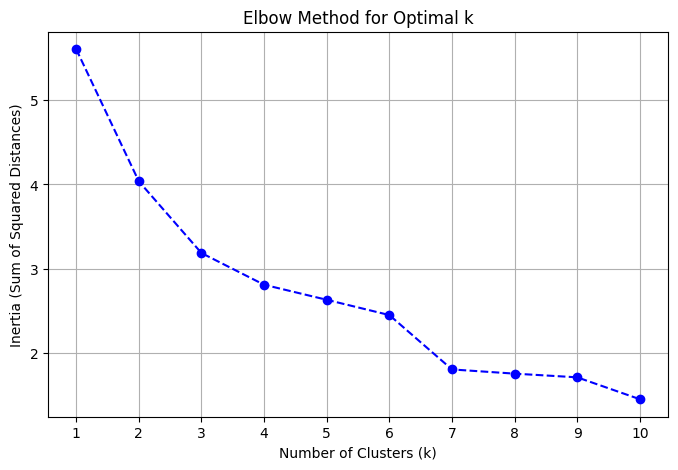

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration
X = freq_all

# Range of clusters to try
cluster_range = range(1, 11)

# List to store the inertia values
inertia_values = []

# Train KMeans for each number of clusters
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


/home/owkin/.local/conda/envs/sowce_env_2/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


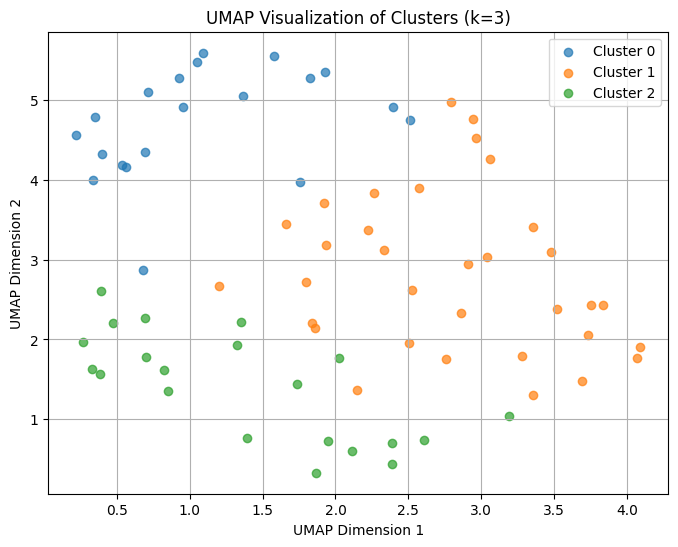

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import umap

# Generate synthetic data
X = freq_all

# Train KMeans with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X)

# Reduce dimensions with UMAP
umap_reducer = umap.UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X)

# Plot UMAP with cluster labels
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(
        X_umap[labels == cluster, 0],
        X_umap[labels == cluster, 1],
        label=f"Cluster {cluster}",
        alpha=0.7
    )

plt.title("UMAP Visualization of Clusters (k=3)")
plt.xlabel("UMAP Dimension 1")
plt.ylabel("UMAP Dimension 2")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
df_subgroups = pd.read_csv("blca__concensus.csv")
df_subgroups['consensusClass'] = df_subgroups['consensusClass'].apply(lambda x: x if x in ["Ba/Sq", "Stroma-rich"] else "Other")
df_subgroups['kmeans_label'] = labels

In [54]:
df_subgroups

,Unnamed: 0,consensusClass,cor_pval,separationLevel,LumP,LumNS,LumU,Stroma-rich,Ba/Sq,NE-like,kmeans_label
0,CH_B_001b,Ba/Sq,1.060693e-82,0.613624,0.264845,0.252351,0.238930,0.419739,0.654532,0.278953,2
1,CH_B_002b,Ba/Sq,3.032641e-74,0.739384,0.530746,0.477998,0.486454,0.506714,0.627664,0.380960,1
2,CH_B_003b,Other,3.534808e-94,0.081815,0.687073,0.663685,0.678870,0.509928,0.398348,0.300893,0
3,CH_B_004b,Other,1.309060e-85,0.174313,0.663178,0.642392,0.647953,0.509285,0.351293,0.252254,1
4,CH_B_006b,Other,1.173035e-57,0.703858,0.565936,0.468274,0.455810,0.456015,0.492881,0.231263,1
...,...,...,...,...,...,...,...,...,...,...,...
69,CH_B_093a,Stroma-rich,9.037988e-47,0.263925,0.176080,0.300489,0.283332,0.516888,0.466334,0.350199,2
70,CH_B_094a,Ba/Sq,2.273188e-68,0.532980,0.220830,0.231173,0.204036,0.404079,0.607307,0.193789,1
71,CH_B_095a,Stroma-rich,7.897557e-48,0.940562,0.223823,0.351742,0.360635,0.522027,0.349131,0.300137,1
72,CH_B_096a,Stroma-rich,1.149479e-39,0.235581,0.273492,0.414206,0.448814,0.479927,0.205412,0.281511,2


/tmp/ipykernel_796/874099078.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annotations = p_values.applymap(annotate_p_value)


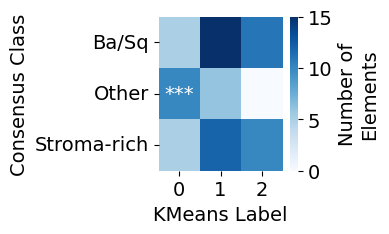

P-Values Matrix:
kmeans_label           0         1         2
consensusClass                              
Ba/Sq           0.982095  0.374055  0.186549
Other           0.000795  0.823075  1.000000
Stroma-rich     0.938537  0.602538  0.162367

Annotation Guide:
    *   : 0.01 <= p < 0.05
   **   : 0.001 <= p < 0.01
  ***   : p < 0.001


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import hypergeom
import numpy as np
plt.rcParams.update({'font.size': 14})

# Create contingency table
contingency_table = df_subgroups.crosstab(df_subgroups['consensusClass'], df['kmeans_label'])

# Total number of samples
N = df_subgroups.shape[0]

# Initialize matrices for counts and p-values
counts = contingency_table.copy()
p_values = pd.DataFrame(index=contingency_table.index, columns=contingency_table.columns)

# Compute p-values
for consensus_class in contingency_table.index:
    for kmeans_label in contingency_table.columns:
        # Observed successes (k)
        k = contingency_table.loc[consensus_class, kmeans_label]
        # Success population size (K)
        K = contingency_table.loc[consensus_class].sum()
        # Cluster size (n)
        n = contingency_table[kmeans_label].sum()
        # Hypergeometric test
        p_value = hypergeom.sf(k - 1, N, K, n)  # P(X >= k)
        p_values.loc[consensus_class, kmeans_label] = p_value

# Convert p-values to numeric
p_values = p_values.apply(pd.to_numeric)

# Create annotations based on p-values
def annotate_p_value(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

annotations = p_values.applymap(annotate_p_value)

# Plot heatmap
plt.figure(figsize=(2, 2))
ax = sns.heatmap(
    counts, 
    annot=annotations,  # Add p-value annotations
    fmt="", 
    cmap="Blues", 
    cbar_kws={'label': 'Number of\nElements'}
)
plt.title("")
plt.xlabel("KMeans Label")
plt.ylabel("Consensus Class")
plt.show()

# Optional: Print p-values for reference
print("P-Values Matrix:")
print(p_values)

# Interpretation Note:
print("\nAnnotation Guide:")
print("    *   : 0.01 <= p < 0.05")
print("   **   : 0.001 <= p < 0.01")
print("  ***   : p < 0.001")


In [56]:
df_km = pd.merge(merged_df, df_subgroups, left_on="Tumour block ID for MOSAIC", right_on="Unnamed: 0")
df_km = df_km.dropna(subset=['pfs_years', 'pfs_censor'])

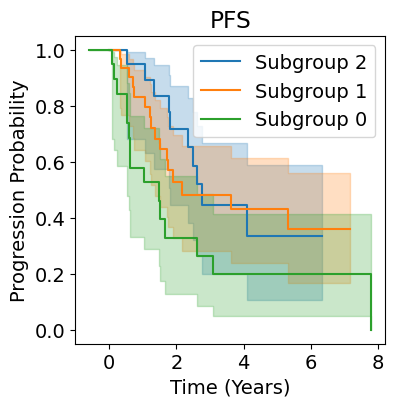

Log-rank test p-value between Subgroup 2 and Subgroup 1: 0.6487
Log-rank test p-value between Subgroup 2 and Subgroup 0: 0.0399
Log-rank test p-value between Subgroup 1 and Subgroup 0: 0.0627


In [57]:
outcome = "pfs"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Assuming df_km is your dataframe with the columns "os_years", "os_censor", and "kmeans_label"

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Set up the plot
plt.figure(figsize=(4, 4))

# Loop over the unique subgroups and plot each Kaplan-Meier curve
subgroups = df_km['kmeans_label'].unique()
for subgroup in subgroups:
    subgroup_data = df_km[df_km['kmeans_label'] == subgroup]
    
    # Fit Kaplan-Meier estimator for this subgroup
    kmf.fit(subgroup_data[outcome+'_years'], event_observed=subgroup_data[outcome+'_censor'], label=f'Subgroup {subgroup}')
    kmf.plot_survival_function()

# Add labels and title
plt.title('PFS')
plt.xlabel('Time (Years)')
plt.ylabel('Progression Probability')
plt.legend()

# Display the plot
plt.show()

# Perform pairwise log-rank tests (1v1 comparisons between each subgroup)
p_values = []
for i in range(len(subgroups)):
    for j in range(i + 1, len(subgroups)):
        subgroup_1 = subgroups[i]
        subgroup_2 = subgroups[j]
        
        data_1 = df_km[df_km['kmeans_label'] == subgroup_1]
        data_2 = df_km[df_km['kmeans_label'] == subgroup_2]
        
        # Perform the log-rank test
        result = logrank_test(data_1[outcome+'_years'], data_2[outcome+'_years'], event_observed_A=data_1[outcome+'_censor'], event_observed_B=data_2[outcome+'_censor'])
        
        # Append the p-value for this comparison rounded to 4 digits
        p_values.append((subgroup_1, subgroup_2, round(result.p_value, 4)))

# Display p-values for each comparison, rounded to 4 digits
for subgroup_1, subgroup_2, p_value in p_values:
    print(f"Log-rank test p-value between Subgroup {subgroup_1} and Subgroup {subgroup_2}: {p_value:.4f}")


In [51]:
df_km

,Unnamed: 0_x,Tumour block ID for MOSAIC,Subject Id_x,Cohort code_x,Sample origin_x,Sample source_x,Sample collection chronology_x,rnaseq_sample_id,Unnamed: 0_y,patient_id,...,consensusClass,cor_pval,separationLevel,LumP,LumNS,LumU,Stroma-rich,Ba/Sq,NE-like,kmeans_label
